In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

In [2]:


with open(r"C:\Users\ayush\Downloads\NextBuy – your perfect purchase\DataSet\ProductDescription.csv", "r", encoding="utf-8", errors="replace") as file:
    content = file.read()

# Use StringIO to simulate a file for pandas
ProductDescriptions = pd.read_csv(StringIO(content))
print(ProductDescriptions.shape)
ProductDescriptions.columns


(74067, 5)


Index(['SnNo', 'Product_ID', 'Product_Name', 'Description', 'Relevance'], dtype='object')

In [3]:
ProductDescriptions = ProductDescriptions.dropna()
ProductDescriptions.shape
ProductDescriptions.head()

,SnNo,Product_ID,Product_Name,Description,Relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(ProductDescriptions["Description"])
X

<74067x7816 sparse matrix of type '<class 'numpy.float64'>'
	with 213467 stored elements in Compressed Sparse Row format>

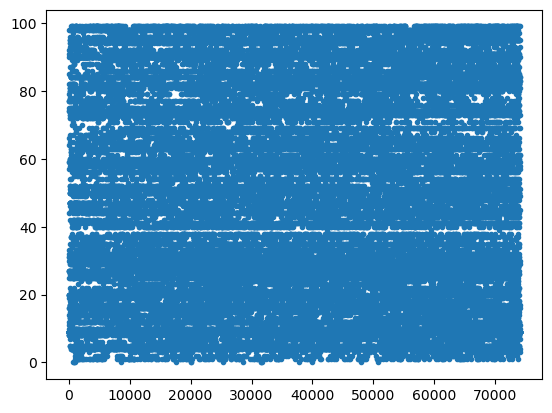

In [6]:
kmeans = KMeans(n_clusters = 100, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
# Define the function to print clusters
def print_cluster(i):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :4]:  
        print(f" {terms[ind]}")

true_k = 50

# Fit the KMeans model
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit_predict(X)

# Get feature names
terms = vectorizer.get_feature_names_out()

# Order centroids
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
print()
# Print clusters
print("Top terms per cluster:")
for i in range(true_k):
    print_cluster(i)



Top terms per cluster:
Cluster 0:
 paint
 doors
 wire
 drill
Cluster 1:
 fireplace
 corner
 electric
 tv
Cluster 2:
 black
 decker
 pipe
 electric
Cluster 3:
 window
 box
 tool
 truck
Cluster 4:
 barn
 door
 syslet
 hardware
Cluster 5:
 valve
 shower
 shutoff
 ball
Cluster 6:
 molding
 trim
 chair
 crown
Cluster 7:
 spray
 paint
 faucet
 kitchen
Cluster 8:
 closet
 doors
 sliding
 maid
Cluster 9:
 unfinished
 cabinets
 doors
 base
Cluster 10:
 fan
 ceiling
 exhaust
 light
Cluster 11:
 sink
 bathroom
 kitchen
 vanity
Cluster 12:
 covers
 galvanized
 patio
 outlet
Cluster 13:
 kit
 repair
 trim
 shower
Cluster 14:
 tub
 shower
 faucet
 faucets
Cluster 15:
 12
 ft
 carpet
 volt
Cluster 16:
 exterior
 doors
 stain
 door
Cluster 17:
 outdoor
 lighting
 led
 recessed
Cluster 18:
 white
 cabinet
 vanity
 cabinets
Cluster 19:
 light
 led
 bulb
 fixture
Cluster 20:
 wall
 mount
 plate
 oven
Cluster 21:
 inch
 vanity
 24
 white
Cluster 22:
 plastic
 cover
 fittings
 covers
Cluster 23:
 storage


In [19]:
import re

def show_recommendations(p_description):
    # Transform the input product description to the same format as the training data
    Y = vectorizer.transform([p_description])
    
    # Predict the cluster for the product description
    prediction = model.predict(Y)
    
    # Retrieve the top terms for the predicted cluster
    cluster_id = prediction[0]
    top_terms = []
    
    # Get the top 10 terms from the cluster centers (adjust based on your number of top terms)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    top_terms = [terms[ind] for ind in order_centroids[cluster_id, :4]]
    
    # Print the top terms for the cluster
    print(f"Recommended words for Cluster {cluster_id}: {top_terms}")
    
    # Iterate through each word and find matching product IDs
    for word in top_terms:
        print(f"\n '{word}' - Product IDs: ", end="")
        # Escape special characters in the term to avoid regex issues
        escaped_term = re.escape(word)
        
        # Get matching products for the current word in the descriptions
        matching_products = ProductDescriptions[ProductDescriptions['Description'].str.contains(escaped_term, case=False, na=False)]
        
        # Print the Product IDs of the matching products
        print(matching_products['Product_ID'].tolist())




In [ ]:
# Example usage:
# Assuming you have your product description (product_desc) and dataframe (df) ready:
product_desc = "Example product description"
show_recommendations(product_desc)

In [9]:
show_recommendations("steel drill")

Recommended words for Cluster 41: ['steel', 'range', 'stainless', 'electric']

 'steel' - Product IDs: [100010, 100033, 100054, 100071, 100071, 100143, 100429, 100447, 100523, 100640, 100725, 100734, 100790, 100790, 100817, 100904, 100945, 101175, 101261, 101272, 101312, 101312, 101442, 101455, 101634, 101729, 101797, 101855, 101967, 102058, 102142, 102142, 102193, 102213, 102221, 102394, 102403, 102406, 102429, 102548, 102609, 102615, 102615, 102636, 102747, 102807, 103161, 103182, 103355, 103440, 103501, 103505, 103580, 103580, 103596, 103751, 103763, 103763, 103794, 103797, 103849, 104014, 104014, 104299, 104395, 104416, 104478, 104508, 104517, 104594, 104594, 104975, 105010, 105057, 105175, 105177, 105228, 105383, 105446, 105451, 105488, 105526, 105543, 105848, 105888, 105908, 105917, 105941, 105963, 106193, 106464, 106677, 106677, 106677, 106689, 106689, 106715, 106875, 106875, 106875, 106975, 107237, 107317, 107325, 107661, 107733, 107811, 107825, 107825, 108031, 108272, 108292, 

In [10]:
show_recommendations("gas mowe")

Recommended words for Cluster 42: ['gas', 'patio', 'range', 'natural']

 'gas' - Product IDs: [100011, 100039, 100068, 100068, 100068, 100068, 100068, 100068, 100077, 100094, 100094, 100095, 100143, 100143, 100143, 100143, 100170, 100208, 100365, 100390, 100390, 100390, 100390, 100407, 100420, 100461, 100461, 100461, 100461, 100461, 100474, 100521, 100536, 100536, 100536, 100536, 100615, 100680, 100680, 100711, 100789, 100804, 100839, 100839, 100839, 100903, 100903, 100903, 100913, 100913, 100972, 100972, 101019, 101019, 101019, 101027, 101065, 101091, 101119, 101119, 101119, 101132, 101148, 101196, 101216, 101216, 101228, 101228, 101228, 101261, 101261, 101261, 101261, 101272, 101334, 101438, 101438, 101455, 101455, 101455, 101455, 101599, 101618, 101618, 101618, 101618, 101618, 101658, 101680, 101748, 101748, 101748, 101748, 101748, 101851, 101899, 101899, 101904, 101911, 102092, 102092, 102103, 102103, 102213, 102213, 102213, 102213, 102235, 102235, 102235, 102263, 102263, 102263, 1

In [12]:
# from sklearn.metrics import silhouette_score

# # Assuming `model` is your fitted KMeans model and `X` is your data matrix (ProductDescriptions vectorized)
# # Get the cluster labels (predicted cluster for each data point)
# y_kmeans = model.predict(X)

# # Calculate Silhouette Score
# sil_score = silhouette_score(X, y_kmeans)
# print(f"Silhouette Score: {sil_score}")


In [13]:
with open(r"C:\Users\ayush\Downloads\NextBuy – your perfect purchase\DataSet\ProductDescription_test.csv", "r", encoding="utf-8", errors="replace") as file:
    content = file.read()

# Use StringIO to simulate a file for pandas
ProductDescriptions_test = pd.read_csv(StringIO(content))
print(ProductDescriptions_test.shape)
ProductDescriptions_test.columns

(166693, 4)


Index(['SnNo', 'Product_ID', 'Product_name', 'Description'], dtype='object')

Precision: 1.00
Recall: 1.00
RMSE: 0.00


c:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


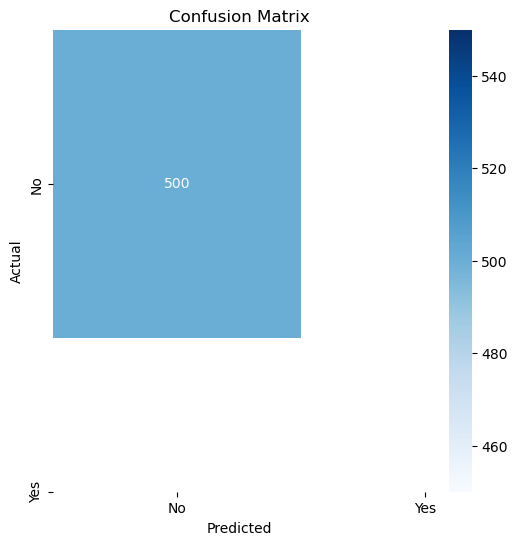

In [ ]:
import random

from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns

# Load the training dataset
train_df = ProductDescriptions_test

# Sample 500 random products from the dataset
train_df = train_df.sample(n=500, random_state=42)  # Randomly sample 500 products

# Function to escape special characters in the word for regex matching
def escape_special_characters(word):
    return re.escape(word)  # This ensures that the word is treated literally in regex

# Assuming you have a recommend function that takes a description and returns a list of recommended words
def recommend(description):
    # A simple example function for keyword extraction, replace with your own logic
    words = description.split()  # Split description into words
    return words  # Assuming all words in the description are considered "relevant" keywords

# Function to check if recommended product contains the original product
def is_recommended_correctly(recommended_words, product_id, df):
    # Get the product descriptions that contain the recommended words
    recommended_products = set()
    for word in recommended_words:
        # Escape any special characters in the word for regex search
        escaped_word = escape_special_characters(word)
        matching_products = df[df['Description'].str.contains(escaped_word, case=False, na=False)]
        recommended_products.update(matching_products['Product_ID'].tolist())
    
    # Check if the original product ID is in the recommended products
    return 1 if product_id in recommended_products else 0

# Calculate Precision, Recall, and RMSE
def calculate_metrics(df):
    true_labels = []  # Will store 1 if correct recommendation, 0 otherwise
    predictions = []  # List of predicted relevance (1 for relevant, 0 for irrelevant)
    
    for _, row in df.iterrows():
        original_product_id = row['Product_ID']
        description = row['Description']
        
        # Get recommended words for this description
        recommended_words = recommend(description)
        
        # Check if the original product is in the recommended products
        true_label = is_recommended_correctly(recommended_words, original_product_id, df)
        true_labels.append(true_label)
        
        # Predictions for RMSE (you can assume 1 for correct recommendations, 0 for incorrect ones)
        predictions.append(true_label)
    
    # Calculate Precision and Recall
    true_positives = sum(true_labels)
    false_positives = len(true_labels) - true_positives
    false_negatives = len(true_labels) - true_positives
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(true_labels, predictions))
    
    return precision, recall, rmse, true_labels, predictions

# Calculate metrics for the train dataset
precision, recall, rmse, true_labels, predictions = calculate_metrics(train_df)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert the data into a DataFrame
df = ProductDescriptions.head(50000)
print(df.columns)
# Step 1: TF-IDF Vectorization of the product descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Description'])

Index(['SnNo', 'Product_ID', 'Product_Name', 'Description', 'Relevance'], dtype='object')


In [16]:
# Step 2: Compute cosine similarity between product descriptions
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [17]:
# Function to get recommendations based on a given product's index
def recommend_products(product_index, cosine_sim, df):
    # Get pairwise similarity scores for the product
    sim_scores = list(enumerate(cosine_sim[product_index]))
    
    # Sort the products based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 5 most similar products (excluding the input product itself)
    sim_scores = sim_scores[1:10]
    product_indices = [i[0] for i in sim_scores]
    
    # Return the top 5 most similar product names and their descriptions
    recommendations = df.iloc[product_indices][['Product_Name', 'Description']]
    return recommendations

# Example: Get recommendations for the first product (index 0)
recommended_products = recommend_products(0, cosine_sim, df)
print(recommended_products)

                                           Product_Name    Description
1212                  Simpson Strong-Tie 12-Gauge Angle  angle bracket
1229  Everbilt 1-1/2 in. Zinc-Plated Corner Brace (4...  angle bracket
1402  Everbilt 1 in. Zinc-Plated Corner Brace (20-Pack)  angle bracket
1953  Crown Bolt 1 in. x 72 in. Plain Steel Angle wi...  angle bracket
2624   Everbilt 3 in. Zinc-Plated Corner Brace (4-Pack)  angle bracket
2740  OWT Ornamental Wood Ties 45-Degree Flush Insid...  angle bracket
2895  Simpson Strong-Tie ZMAX 18-Gauge Galvanized St...  angle bracket
4108    Simpson Strong-Tie 16-Gauge Concrete Form Angle  angle bracket
5818  Simpson Strong-Tie Z-MAX 2 in. x 4 in. 12-Gaug...  angle bracket


Precision: 0.46
Recall: 0.46
RMSE: 0.00


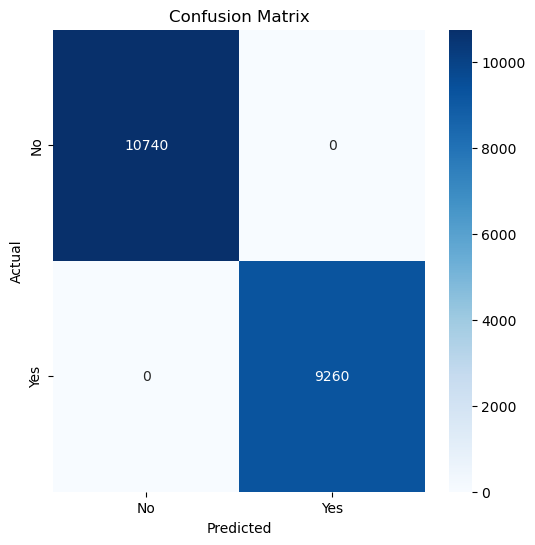

In [18]:
import random
import re
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (assuming `ProductDescriptions_test` is the dataset you are working with)
train_df = ProductDescriptions_test.sample(n=20000, random_state=42)  # Sample 500 random products

# Reset index of the DataFrame to ensure continuous indices
train_df.reset_index(drop=True, inplace=True)

# TF-IDF Vectorization of the product descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train_df['Description'])

# Compute cosine similarity between product descriptions
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define the function to get recommendations based on cosine similarity
def recommend(product_index, cosine_sim, df, top_n=100):
    # Get pairwise similarity scores for the product
    sim_scores = list(enumerate(cosine_sim[product_index]))
    
    # Sort the products based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N most similar products (excluding the input product itself)
    sim_scores = sim_scores[1:top_n+1]  # Exclude the product itself
    recommended_indices = [i[0] for i in sim_scores]
    
    # Return the product IDs of the top N recommended products
    return df.iloc[recommended_indices]['Product_ID'].tolist()

# Function to check if recommended products are correct
def is_recommended_correctly(recommended_product_ids, product_id, df):
    # Check if the original product ID is in the recommended products
    return 1 if product_id in recommended_product_ids else 0

# Calculate Precision, Recall, and RMSE
def calculate_metrics(df, cosine_sim, top_n=3):
    true_labels = []  # Will store 1 if correct recommendation, 0 otherwise
    predictions = []  # List of predicted relevance (1 for relevant, 0 for irrelevant)
    
    for _, row in df.iterrows():
        original_product_id = row['Product_ID']
        product_index = row.name  # Get the index of the product in the DataFrame
        
        # Get recommended product IDs for this product
        recommended_product_ids = recommend(product_index, cosine_sim, df, top_n=100)
        
        # Check if the original product is in the recommended products
        true_label = is_recommended_correctly(recommended_product_ids, original_product_id, df)
        true_labels.append(true_label)
        
        # Predictions for RMSE (you can assume 1 for correct recommendations, 0 for incorrect ones)
        predictions.append(true_label)
    
    # Calculate Precision and Recall
    true_positives = sum(true_labels)
    false_positives = len(true_labels) - true_positives
    false_negatives = len(true_labels) - true_positives
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(true_labels, predictions))
    
    return precision, recall, rmse, true_labels, predictions

# Calculate metrics for the train dataset
precision, recall, rmse, true_labels, predictions = calculate_metrics(train_df, cosine_sim, top_n=100)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
